# Случайные леса (Random Forest) - Классификация

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../DATA/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Разбиение на обучающий и тестовый наборы данных - Train | Test Split

In [10]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True, dtype=int)
y = df['species']

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Случайные леса для классификации - Random Forest Classification

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |
 |  A random forest classifier.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
 |  The sub-sample size is controlled with the `max_samples` parameter i

Параметр `max_features` может принимать как текстовые, так и числовые значения(как целые числа, так и числа с плавающей точкой). По умолчанию принимает значение *"sqrt"*. 
* В качестве текстовых значений можно передать {"sqrt", "log2", None}. Здесь, для значения *'None'* следующий принцип - If None, then `max_features=n_features`, т.е. количество признаков в поднаборах будет равно общему количеству признаков. **Важно: такое значение не в полной мере реализует задумку случайных лесов, потому что она заключается в том, чтобы в каждом наоре признаков участвовали не все признаки, а только их случайный поднабор.**
* Если передавать целое число, то в каждом разбиении будет рассматриваться поднабор из указанного количества признаков. Например, если указать 2, то при каждом разбиении будет браться 2 случайных признака из общего набора признаков. И далее, в каждом конкретном узле, какой-то из этих двух признаков будет применяться для разбиения данных в узле.
* Если передавать число с плавающей точкой, то это будет *доля от общего количества признаков*. Например, для переданного значения 0.2 - это будет 20% от общего количества признаков. **Важно: этот параметр бывает не всегда удобен, поэтому, если нам не нужны проценты, лучше просто указывать целое число.**

In [24]:
# Используем 10 случайных деревьев
# random_state в данном случае пригодится для того,
# чтобы позднее можно было запустить обучение на тех же
# данных и воспроизвести точно такие же результаты, т.е.
# выбирая те же самые поднаборы признаков в узлах
rfc = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=101)

In [26]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [28]:
preds = rfc.predict(X_test)

In [30]:
preds

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'A

## Оценка работы модели

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

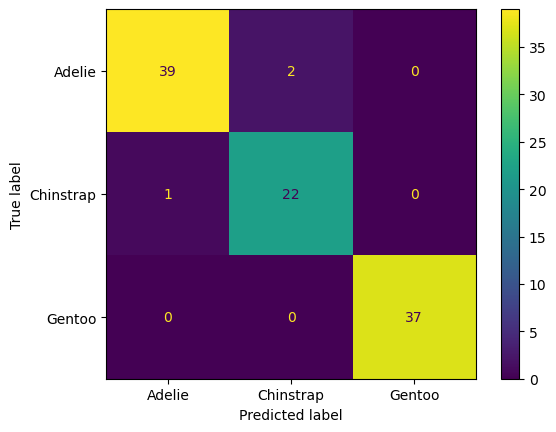

In [35]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

Модель неправильно классифицировала трёх пингвинов.

In [38]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



Можно отметить хорошие значения метрик accuracy, precision и recall.

## Важность признаков
Очень полезный атрибут обученной модели!

In [42]:
rfc.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

# Выбираем правильное количество деревьев

Исследуем, приведёт ли добавление дополнительных деревьев к улучшению производительности

In [45]:
from sklearn.metrics import accuracy_score

In [47]:
test_errors = []

for n in range(1, 40):
    # Будем использовать n случайных деревьев
    model = RandomForestClassifier(n_estimators=n, max_features='sqrt')
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    test_errors.append(1 - accuracy_score(test_preds, y_test))

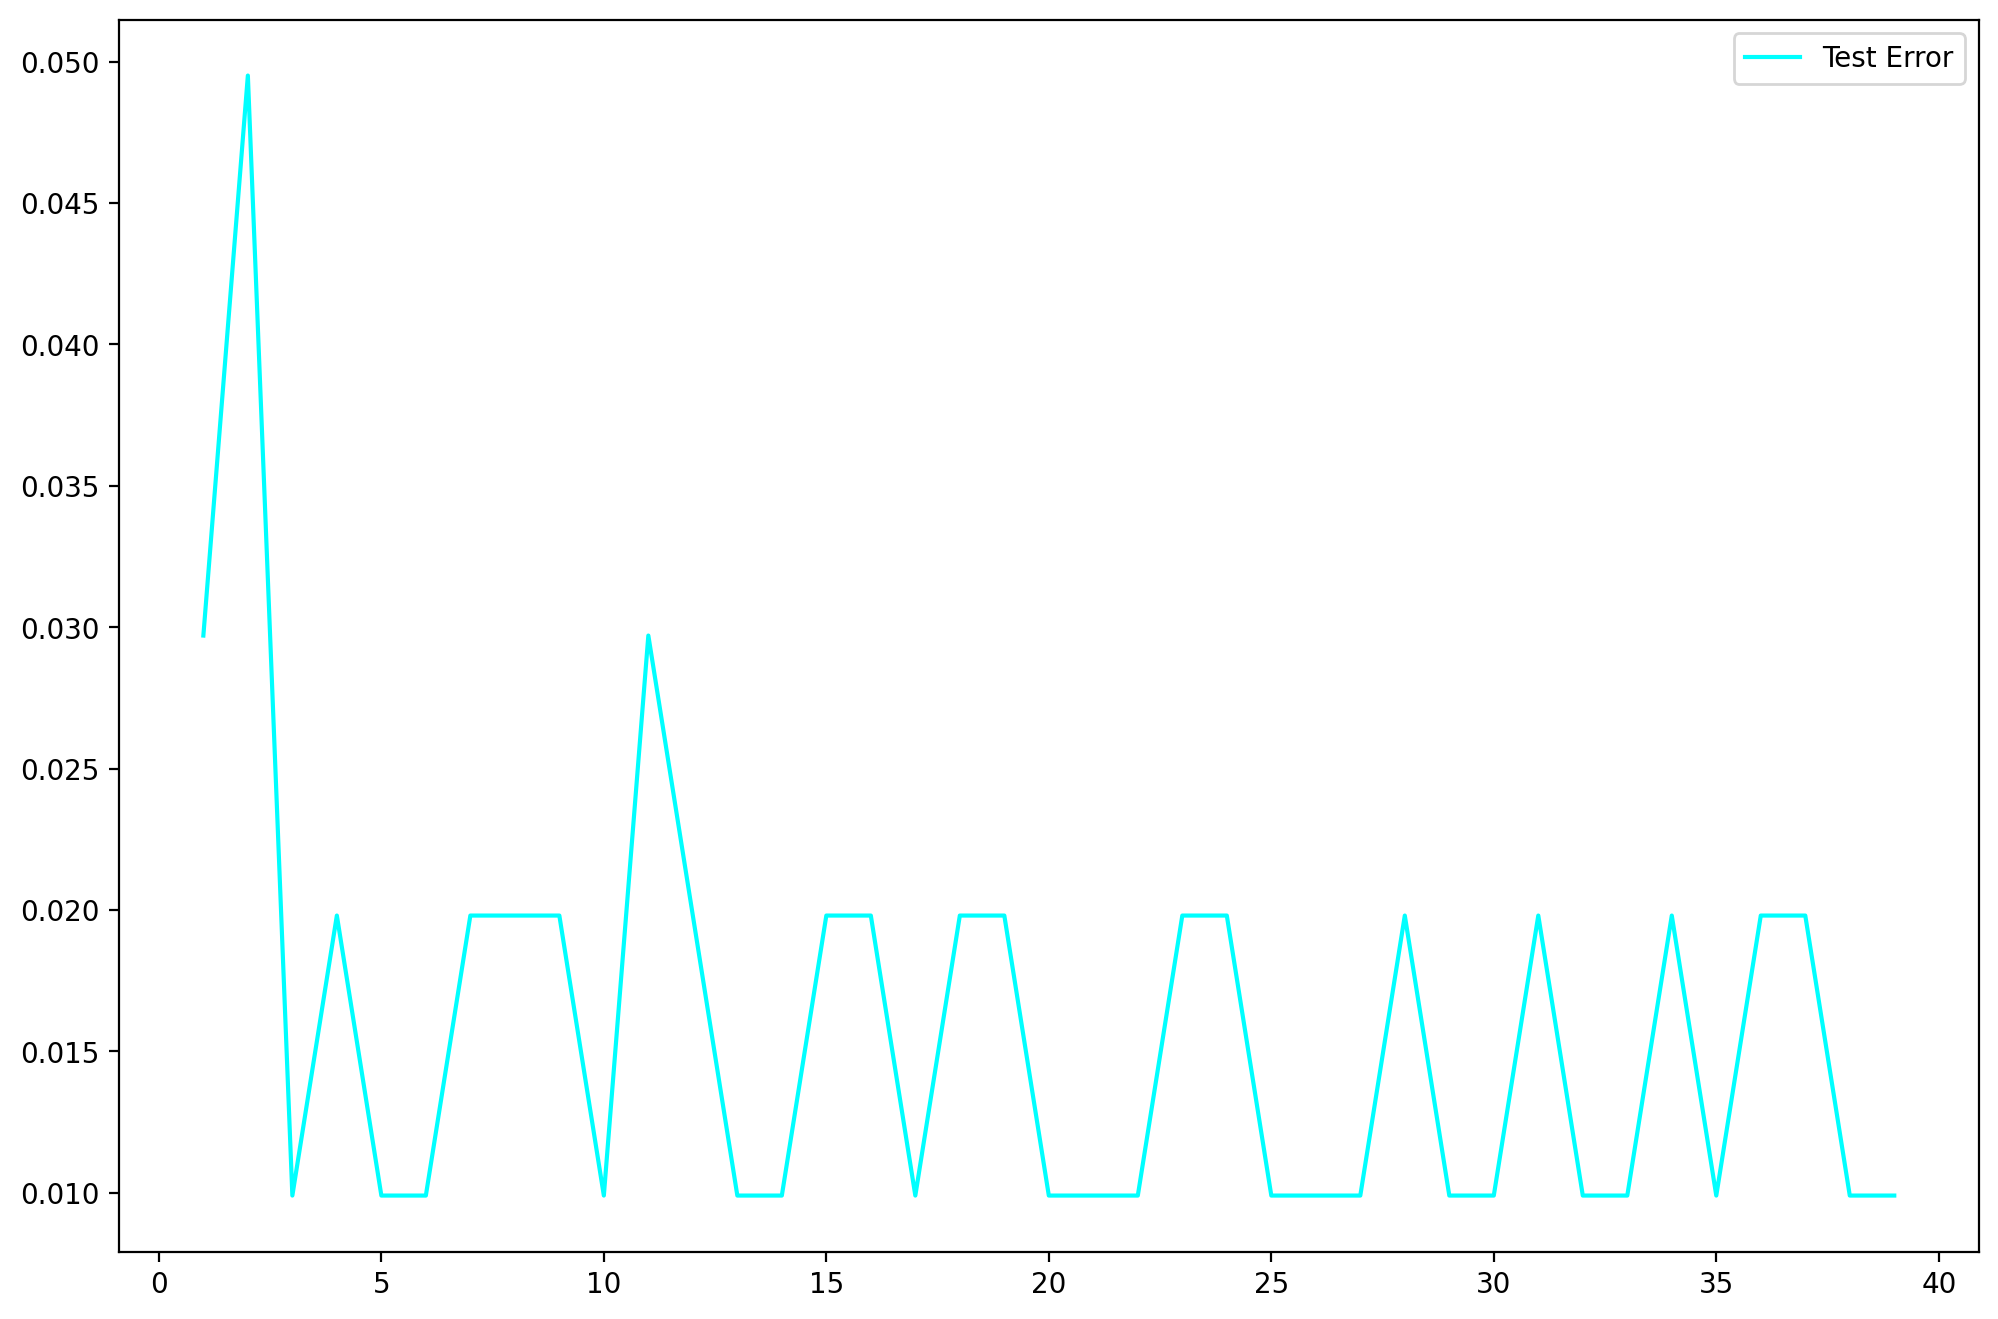

In [49]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(range(1, 40), test_errors, label='Test Error', color='aqua')
plt.legend()
plt.show()

Видно, что мы получаем всё меньше пользы при добавлении дополнительных деревьев. Для такого маленького набора данных вся нужная информация извлекается, по сути, с помощью примерно 5 деревьев.

# Случайные леса - исследование гиперпараметров

Будем работать с более крупным набором данных "banknote authentication" из репозитория данных **US Irvine ML Data Repository**. В этом наборе данных содержится информация о результатах сканирования настоящих и поддельных банкнот, для которых было выполнено вейвлет-преобразование, которое позволяет получить некоторый набор численных характеристик для каждого изображения.

**Задача - научиться определять настоящая банкнота или фальшивая.**

На входе имеются четыре признака:
* Variance вейвлет-трансформации
* Skewness вейвлет-трансформации
* Curtosis вейвлет-трансформации
* Энтропия изображения - сколько шума было в изображении

Для целевой переменной *Class*:
* 0 - настоящие банкноты
* 1 - поддельные банкноты

In [54]:
second_df = pd.read_csv('../DATA/data_banknote_authentication.csv')
second_df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<Figure size 2400x1600 with 0 Axes>

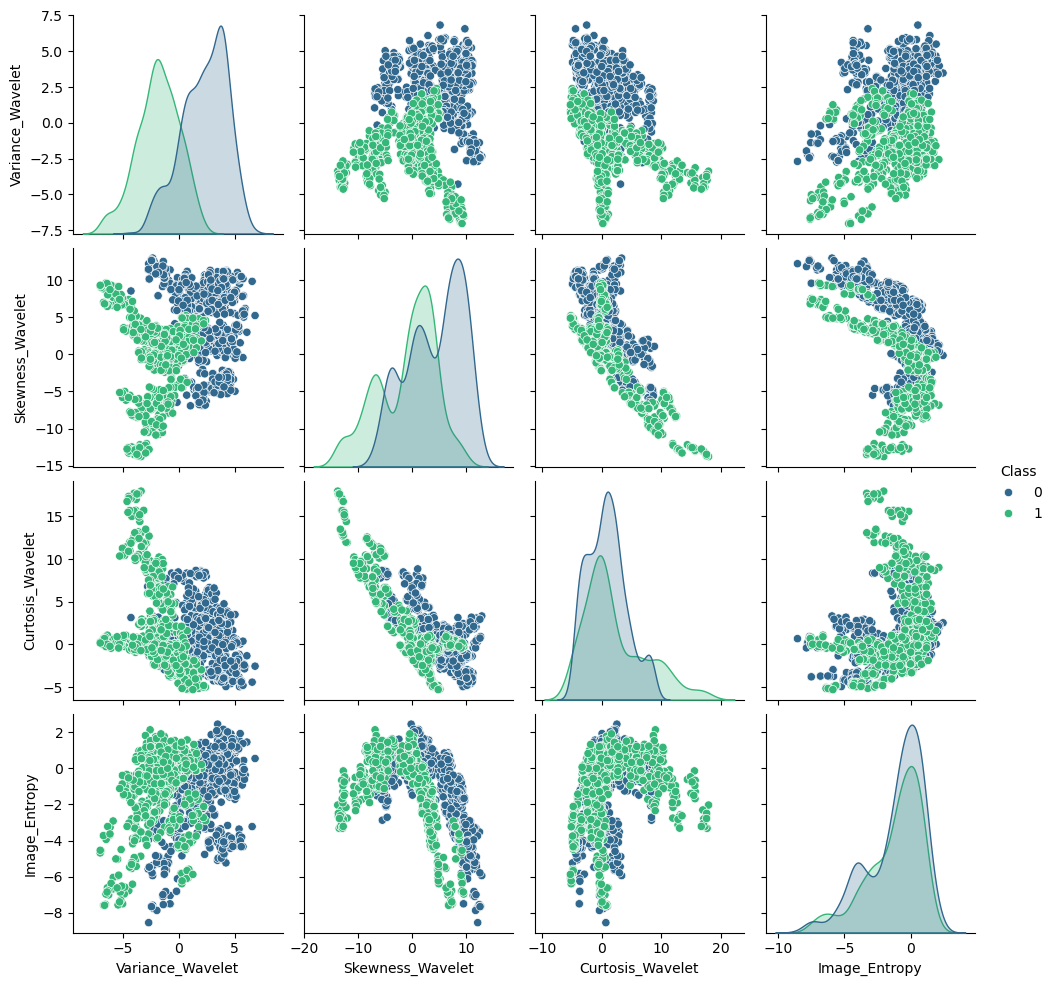

In [59]:
plt.figure(figsize=(12, 8), dpi=200)
sns.pairplot(data=second_df, hue='Class', palette='viridis')
plt.show()

Можно отметить, что два класса хорошо отделимы друг от друга. Некоторые признаки, например Энтропия, имеют достаточно похожие распределения данных, но с помощью других признаков, создается впечатление, что классы возможно отделить друг от друга.

## Разбиение на обучающий и тестовый наборы данных - Train | Test Split

In [65]:
X = second_df.drop('Class', axis=1)
y = second_df['Class']

In [67]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

## Поиск по сетке

In [72]:
from sklearn.model_selection import GridSearchCV

In [76]:
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

In [78]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'bootstrap': bootstrap,
              'oob_score': oob_score}

In [80]:
second_rfc = RandomForestClassifier()

In [82]:
grid = GridSearchCV(second_rfc, param_grid)

In [84]:
grid.fit(X_train, y_train)

C:\Users\chern\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chern\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chern\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\chern\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 448, in fit
    raise ValueError

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [86]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 200, 'oob_score': False}

In [88]:
second_rfc = RandomForestClassifier(max_features=2, n_estimators=200, bootstrap=True, oob_score=True)

In [90]:
second_rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [92]:
second_rfc.oob_score_

0.9931389365351629

Это доля значений, которые были классифицированы правильно.

In [95]:
second_rfc_preds = second_rfc.predict(X_test)

## Оценка работы модели

In [98]:
print(classification_report(y_test, second_rfc_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



Получаем значение accuracy очень близкое к тому, которое было получено в метрике oob_score. Эти метрики, по идее, не должны очень сильно отличаться друг от друга. Однако, эти метрики вычисляются по разному: accuracy измеряется для всего случайного леса и на всём наборе тестовых данных, а oob_score измеряется только с помощью отдельных деревьев и каждый раз только на каких-то отдельных данных.

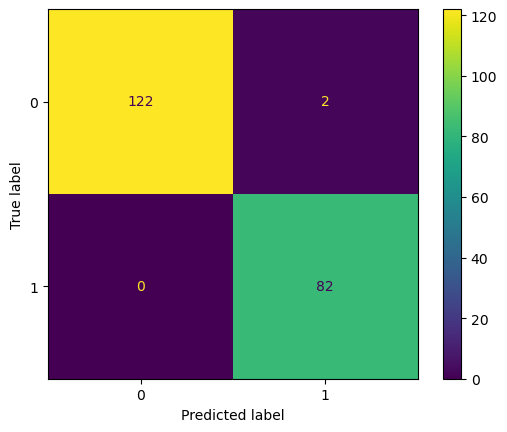

In [101]:
ConfusionMatrixDisplay.from_estimator(second_rfc, X_test, y_test)

Здесь неправильно определились классы только для двух банкнот.

## Количество деревьев - Number of Estimators (Trees)
Нарисуем график зависимости ошибки от количества деревьев (Error vs. Number of Estimators).

In [106]:
erorrs = []
misclassifications = []

for n in range(1, 200):
    
    rfc = RandomForestClassifier(n_estimators=n, bootstrap=True, max_features=2)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    
    error = 1 - accuracy_score(y_test, preds)
    erorrs.append(error)

    # Сравнение выполняется отдельно для каждого элемента Series
    # значения True(1) будут там, где есть различия
    n_missed = np.sum(preds != y_test)
    misclassifications.append(n_missed)

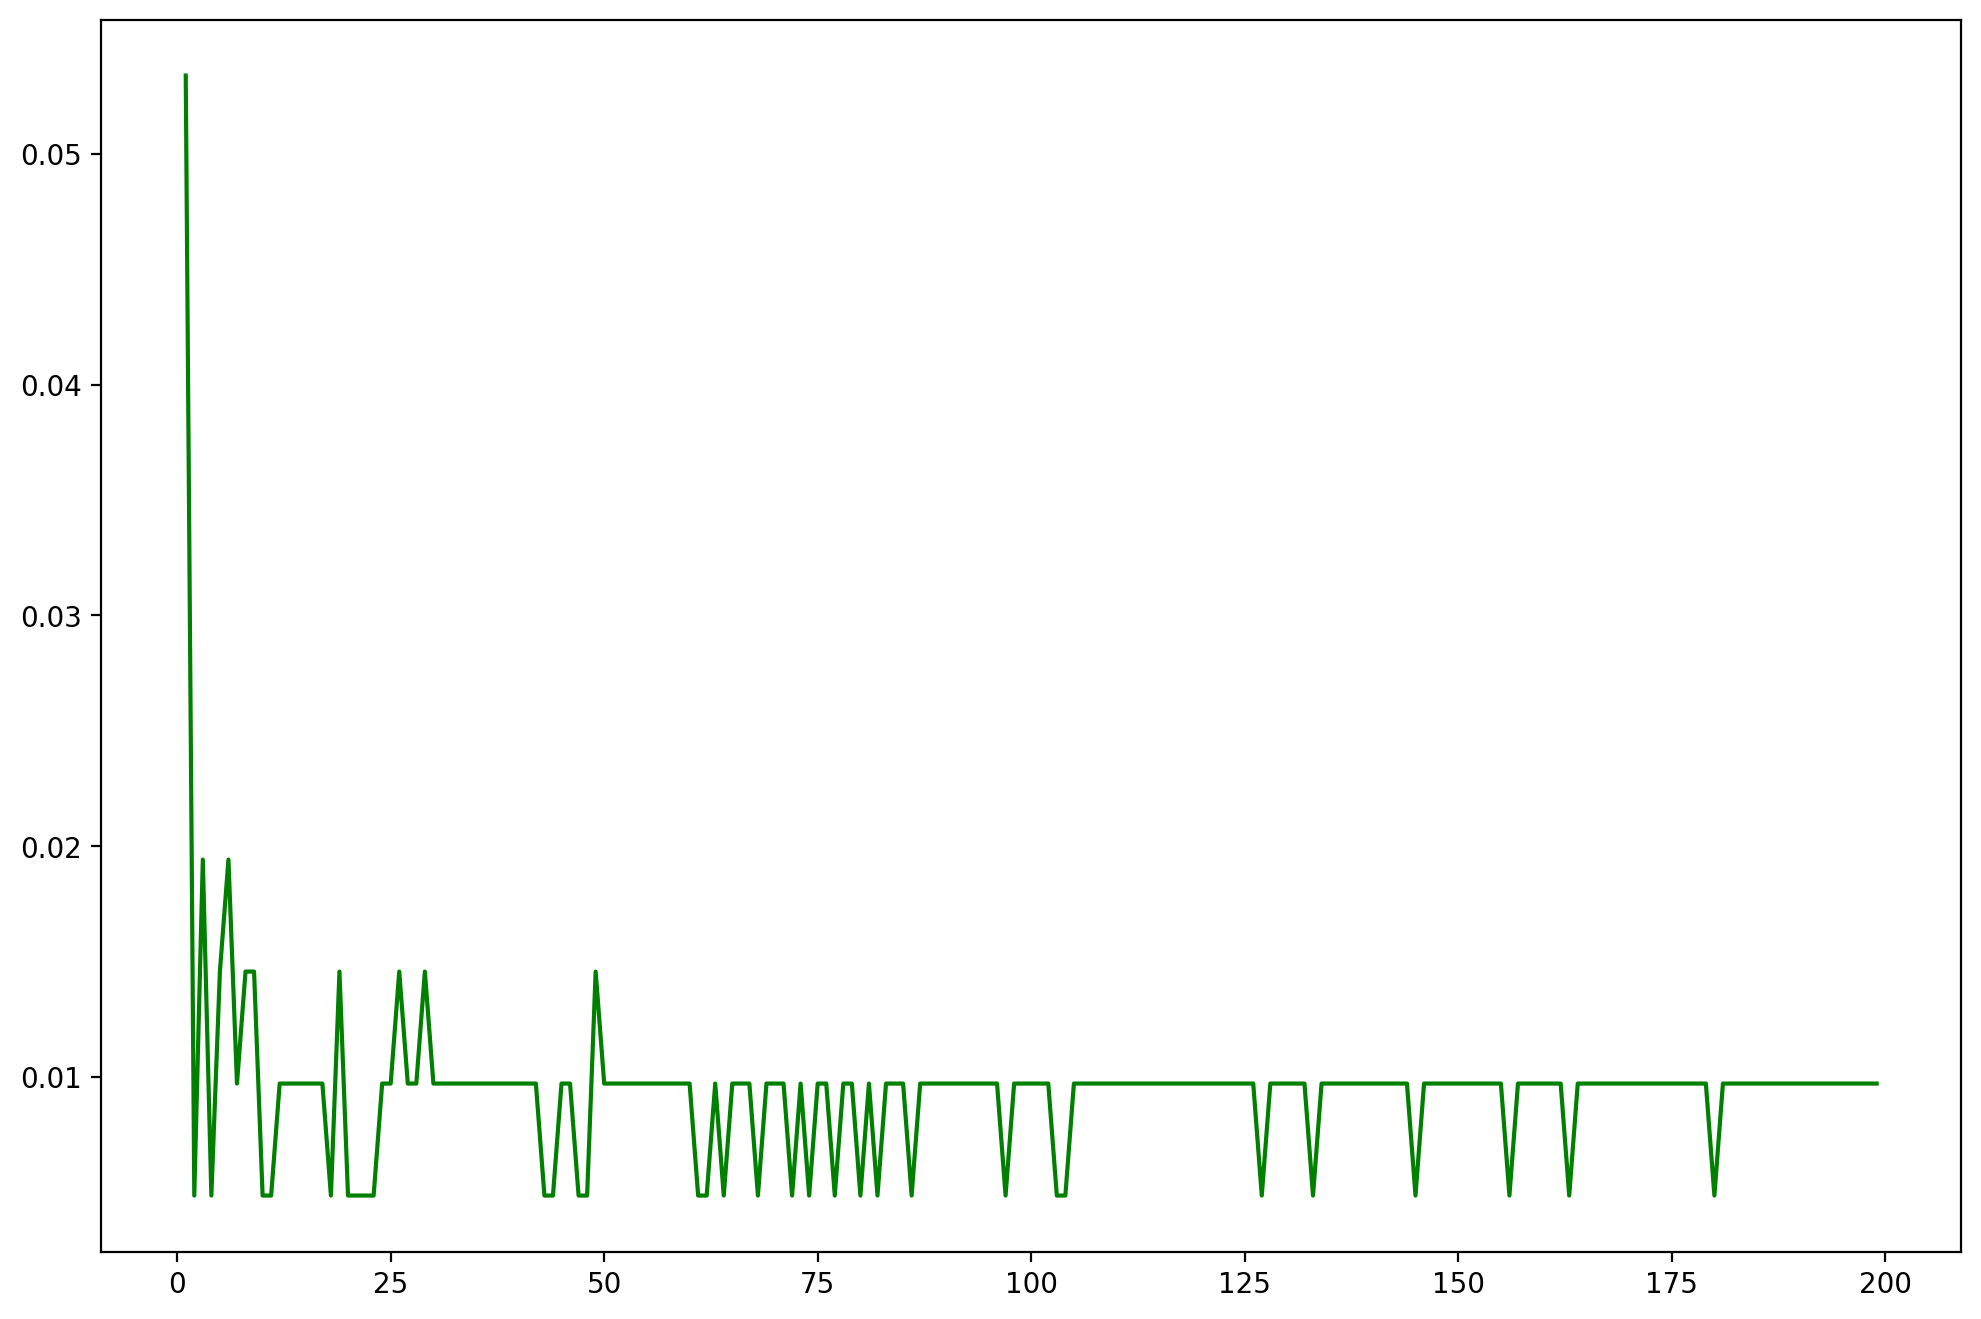

In [108]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(range(1, 200), erorrs, color='green')
plt.show()

Видим некоторый шум в начале, но после него наблюдается выход на некоторое плато. Получается, что добавление дополнительных деревьев не приводит к уменьшению ошибок.

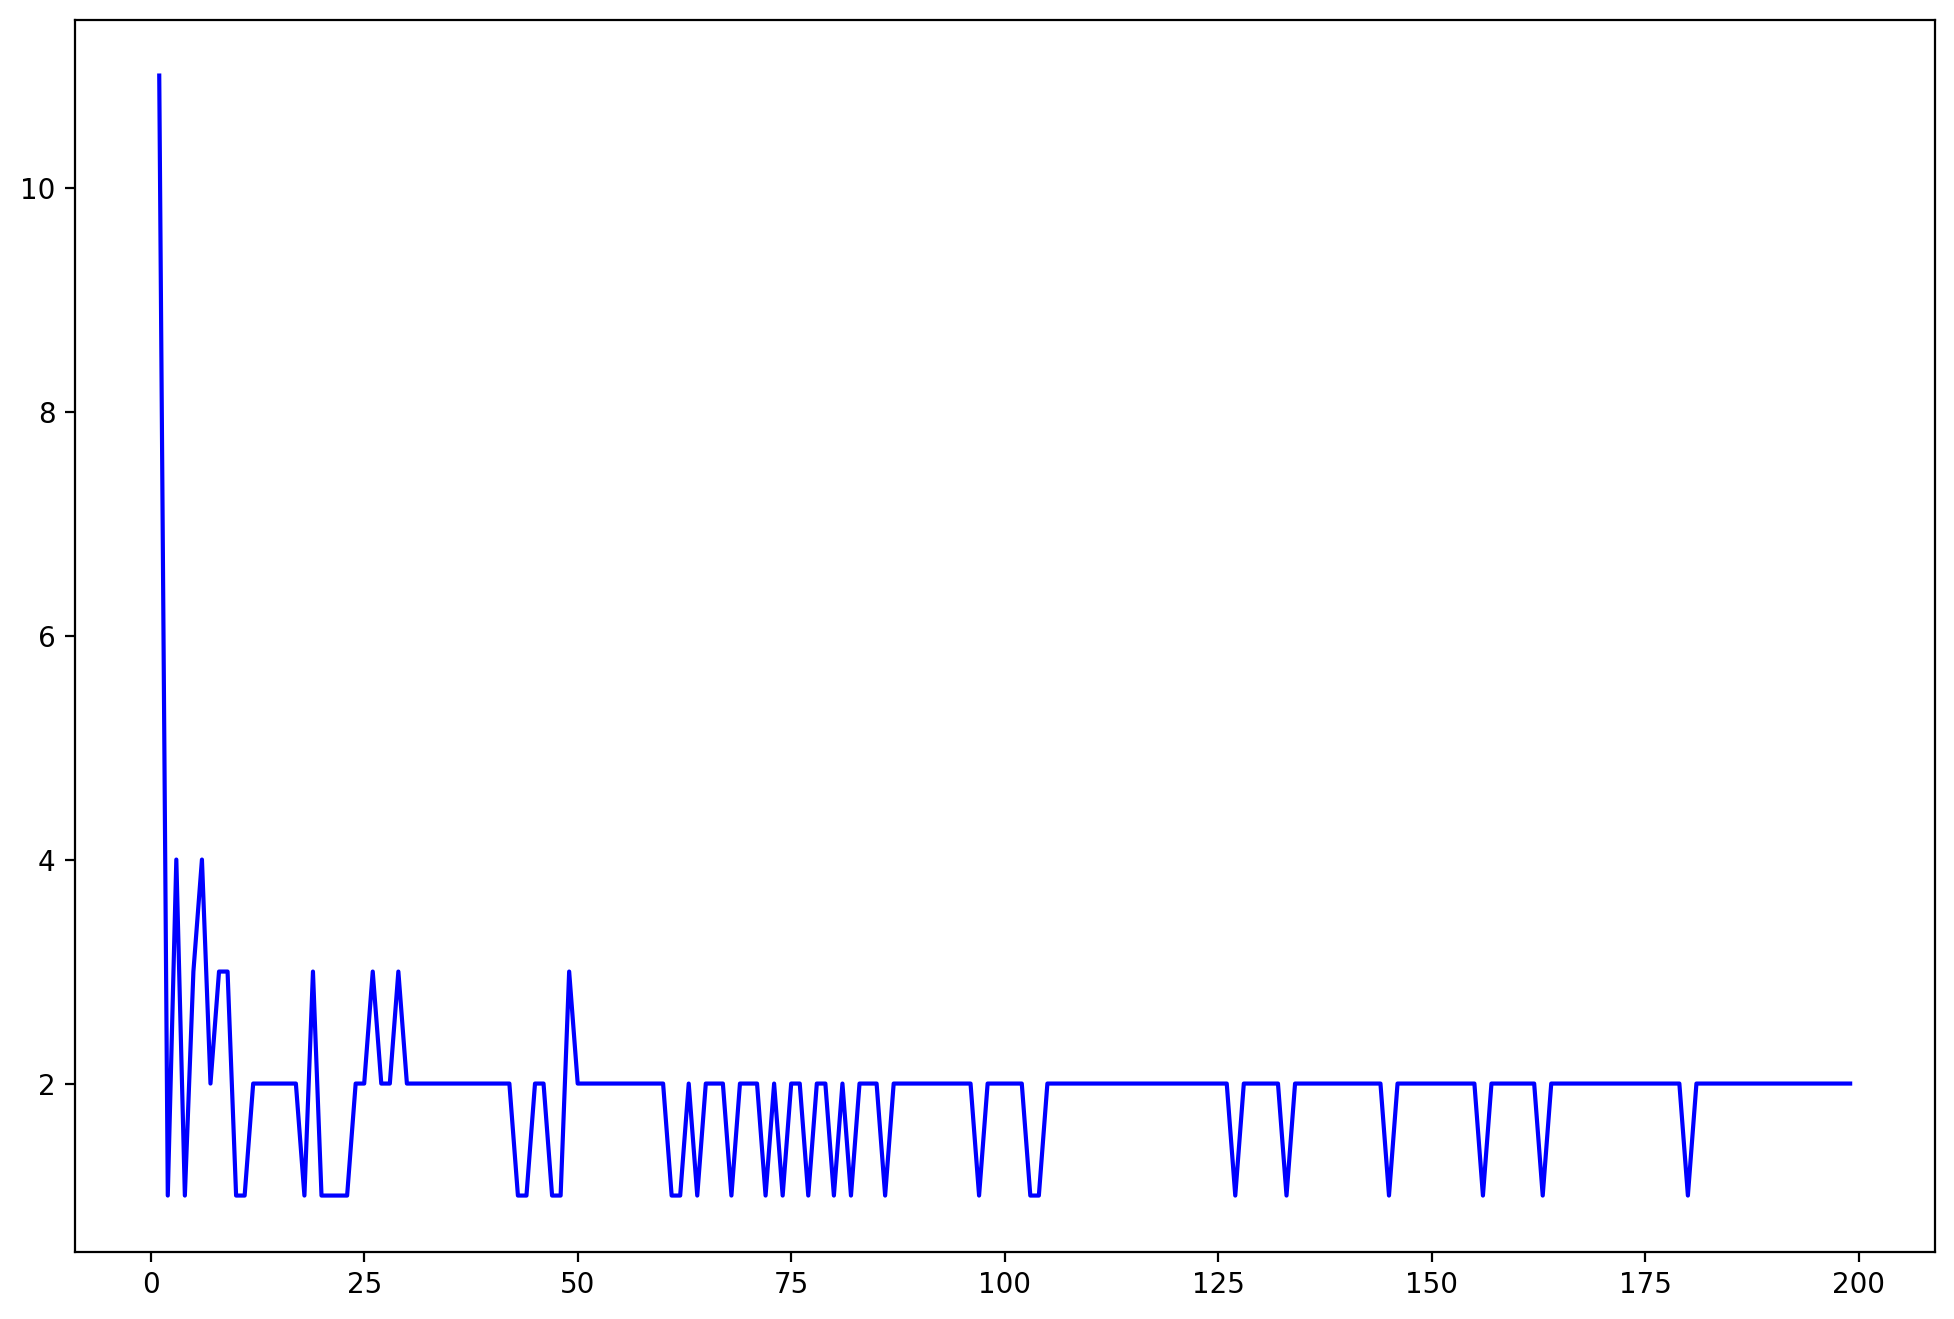

In [111]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(range(1, 200), misclassifications, color='blue')
plt.show()

Здесь наблюдается схожая картина - в начале, количество неправильно классифицированных элементов уменьшается, но с определённого момента наблюдается либо одна, либо две неправильно классифицированных точки.

Получается, что 200 деревьев в данной задаче не нужны, можно вполне обойтись 25-50 деревьями решений.